### Enunciado

Basándote en el ejemplo del árbol de decisión para jugar al tenis, crea un nuevo sistema de decisión para elegir entre realizar una caminata en la montaña o visitar un museo.

### Datos de entrenamiento

Crea un dataset con las siguientes variables:

-   **Clima**: Soleado, Nublado, Lluvia
-   **Temperatura**: Cálido (>25°C), Templado (15-25°C), Frío (<15°C)
-   **Pronóstico\_Siguiente\_Hora**: Mejora, Igual, Empeora
-   **Día\_Semana**: Laboral, Fin\_de\_Semana
-   **Decisión**: Montaña, Museo

Datos de ejemplo para empezar

```
data = {
    'Clima': ['Soleado', 'Nublado', 'Lluvia'],
    'Temperatura': ['Cálido', 'Templado', 'Frío'],
    'Pronostico_Siguiente_Hora': ['Mejora', 'Empeora', 'Igual'],
    'Dia_Semana': ['Laboral', 'Fin_de_Semana'],
    'Decision': ['Montaña', 'Museo', 'Montaña']
}
```

# Preparacion del entorno

In [52]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuracion para visualizaciones
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

# Tareas

1.  **Preparación de datos**
    
    -   Crea un dataset con al menos 20 ejemplos
    -   Codifica las variables categóricas
    -   Divide el dataset en entrenamiento y prueba  

In [53]:
# Crea un dataset con al menos 20 ejemplos
data = {
    "Clima": ["Soleado", "Nublado", "Lluvia", "Soleado", "Nublado", "Lluvia", "Nublado", "Soleado", "Lluvia", "Soleado",
              "Nublado", "Lluvia", "Soleado", "Nublado", "Lluvia", "Soleado", "Nublado", "Lluvia", "Nublado", "Soleado"],
    "Temperatura": ["Cálido", "Templado", "Frío", "Templado", "Cálido", "Templado", "Frío", "Cálido", "Templado", "Frío",
                    "Cálido", "Templado", "Frío", "Cálido", "Templado", "Frío", "Cálido", "Templado", "Frío", "Cálido"],
    "Pronostico_Siguiente_Hora": ["Mejora", "Igual", "Empeora", "Igual", "Mejora", "Igual", "Empeora", "Mejora", "Igual",
                                  "Empeora", "Mejora", "Igual", "Empeora", "Igual", "Mejora", "Igual", "Empeora", "Mejora", "Igual", "Empeora"],
    "Dia_Semana": ["Fin_de_Semana", "Laboral", "Laboral", "Fin_de_Semana", "Laboral", "Fin_de_Semana", "Laboral",
                   "Fin_de_Semana", "Laboral", "Fin_de_Semana", "Laboral", "Fin_de_Semana", "Laboral", "Fin_de_Semana",
                   "Laboral", "Fin_de_Semana", "Laboral", "Fin_de_Semana", "Laboral", "Fin_de_Semana"],
    "Decision": ["Montaña", "Museo", "Museo", "Montaña", "Montaña", "Museo", "Museo", "Montaña", "Museo", "Montaña",
                 "Museo", "Montaña", "Museo", "Montaña", "Museo", "Montaña", "Museo", "Montaña", "Museo", "Montaña"]
}

# Conversion del dataset a un DataFrame
df = pd.DataFrame(data)

print("Primeros registros del dataset:")
display(df.head())

print("Distribucion de decisiones:")
display(df['Decision'].value_counts())

# Codifica las variables categóricas
le = LabelEncoder()
df_encoded = df.copy()

for column in df.columns:
    df_encoded[column] = le.fit_transform(df[column])

print("Dataset codificado:")
display(df_encoded.head())

# preparacion de las variables para el modelo
X = df_encoded.drop("Decision", axis=1)
y = df_encoded["Decision"]

# Divide el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 es la proporcion del conjunto de datos que se asignara al conjunto de prueba (un 20% en este caso)
# random_state=42 es la aleatoriedad en la división de los datos

Primeros registros del dataset:


,Clima,Temperatura,Pronostico_Siguiente_Hora,Dia_Semana,Decision
0,Soleado,Cálido,Mejora,Fin_de_Semana,Montaña
1,Nublado,Templado,Igual,Laboral,Museo
2,Lluvia,Frío,Empeora,Laboral,Museo
3,Soleado,Templado,Igual,Fin_de_Semana,Montaña
4,Nublado,Cálido,Mejora,Laboral,Montaña


Distribucion de decisiones:


,count
Decision,
Montaña,10
Museo,10


Dataset codificado:


,Clima,Temperatura,Pronostico_Siguiente_Hora,Dia_Semana,Decision
0,2,0,2,0,0
1,1,2,1,1,1
2,0,1,0,1,1
3,2,2,1,0,0
4,1,0,2,1,0


**Modelo**

-   Implementa un árbol de decisión
-   Ajusta la profundidad máxima
-   Visualiza el árbol resultante

Score del modelo: 0.875


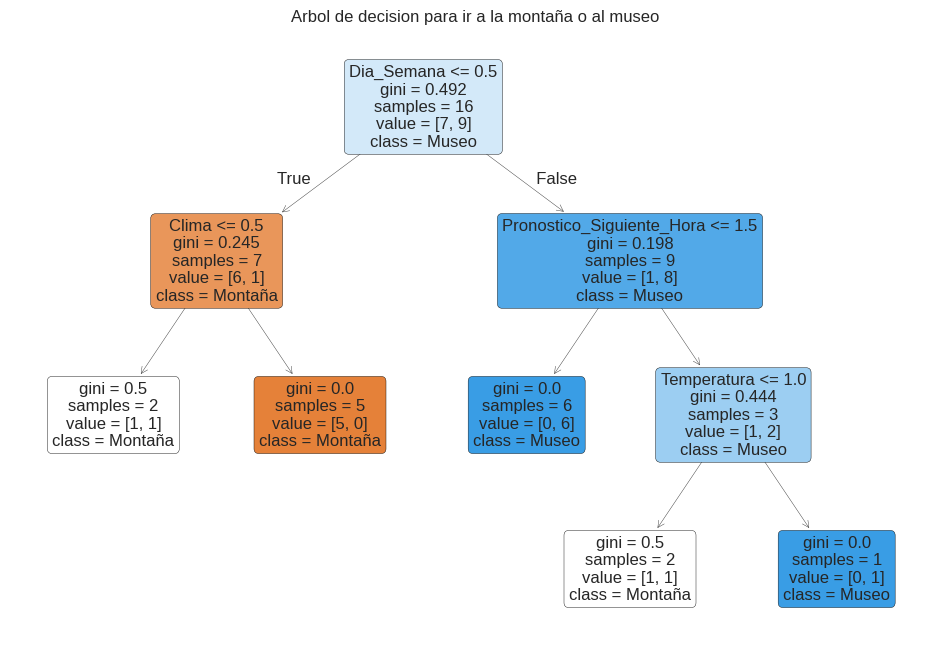

In [54]:
# Implementa un árbol de decisión
dt = DecisionTreeClassifier(random_state=42, max_depth=3) # Ajusta la profundidad máxima (max_depth=3)
dt.fit(X_train, y_train)

# Evaluacion del modelo
print("Score del modelo:", dt.score(X_train, y_train))

# Visualiza el árbol resultante
plt.figure(figsize=(12, 8))
plot_tree(
    dt,
    feature_names=["Clima", "Temperatura", "Pronostico_Siguiente_Hora", "Dia_Semana"],
    class_names=["Montaña", "Museo"],
    filled=True,
    rounded=True,
    fontsize=12
    )

plt.title("Arbol de decision para ir a la montaña o al museo")
plt.show()

3. **Evaluación**

-   Calcula la precisión del modelo
-   Identifica las características más importantes
-   Crea una matriz de confusión

Precision del modelo en el conjunto de entrenamiento: 0.875
Precision del modelo en el conjunto de prueba: 1.0


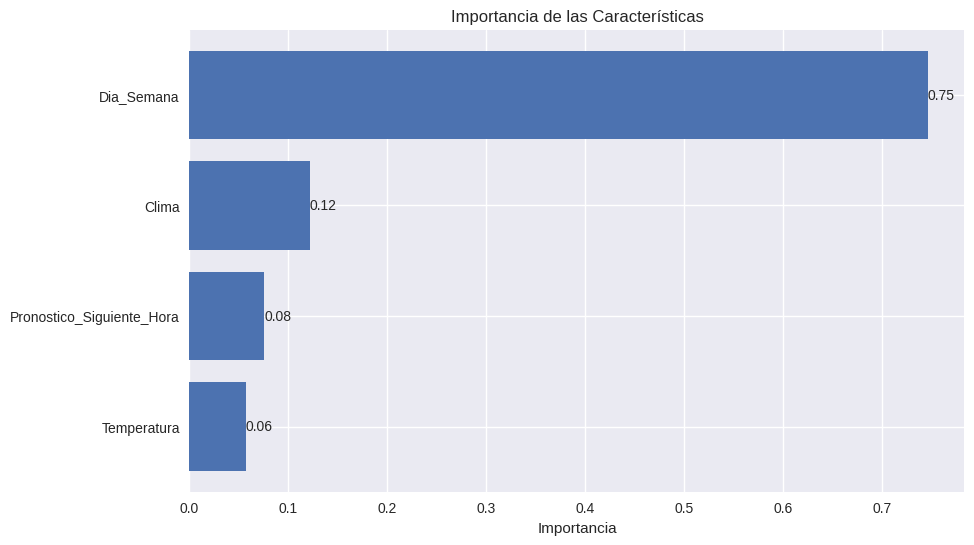

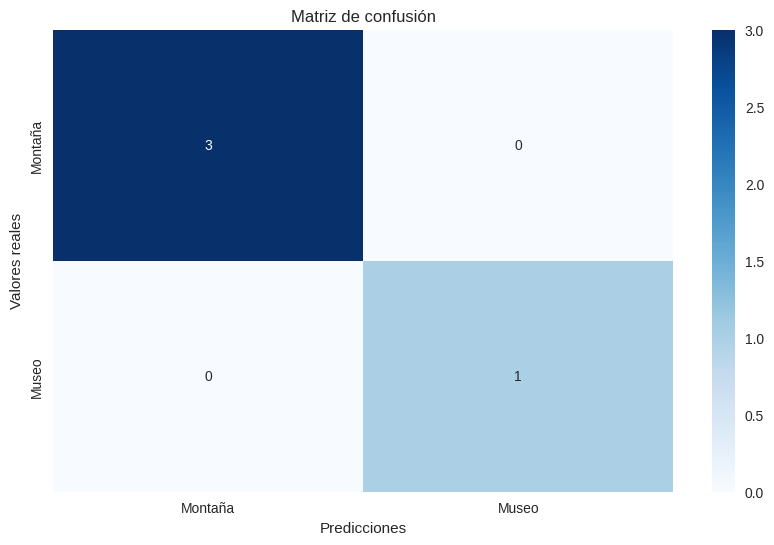

In [55]:
# Calcula la precisión del modelo (score)

# Calculo para el conjunto de entrenamiento
train_score = dt.score(X_train, y_train)

# Calculo para el conjunto de prueba
test_score = dt.score(X_test, y_test)

print("Precision del modelo en el conjunto de entrenamiento:", train_score)
print("Precision del modelo en el conjunto de prueba:", test_score)

# Identifica las características más importantes (he añadido su visualizacion)
importance = pd.DataFrame({
    "Feature": ["Clima", "Temperatura", "Pronostico_Siguiente_Hora", "Dia_Semana"],
    "Importance": dt.feature_importances_
})

importance = importance.sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'])
plt.title('Importancia de las Características')
plt.xlabel('Importancia')

# se añaden los valores a las barras del grafico
for i, value in enumerate(importance['Importance']):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.show()

# Crea una matriz de confusión
y_pred = dt.predict(X_test) # predicciones en el conjunto de prueba

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Montaña", "Museo"],
            yticklabels=["Montaña", "Museo"])

plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

4.  **Aplicación práctica**
    
    -   Crea una función que reciba nuevas condiciones y recomiende una actividad
    -   Incluye las probabilidades en la recomendación
    -   Prueba con al menos 3 casos diferentes  

In [56]:
def activity_recommendation(weather, temperature, forecast, day_of_week):
  # Mapeo de valores categóricos a numéricos
  weather_map = {'Soleado': 2, 'Nublado': 0, 'Lluvia': 1}
  temperature_map = {'Cálido': 0, 'Templado': 2, 'Frío': 1}
  forecast_map = {'Mejora': 0, 'Empeora': 1, 'Igual': 2}
  day_of_week_map = {'Laboral': 0, 'Fin_de_Semana': 1}

  # Nuevo DataFrame para la predicción
  new_case = pd.DataFrame(
      [[weather_map[weather],
        temperature_map[temperature],
        forecast_map[forecast],
        day_of_week_map[day_of_week]]],
        columns=["Clima", "Temperatura", "Pronostico_Siguiente_Hora", "Dia_Semana"]  # nombres de las columnas
    )

  # Prediccion
  prediction = dt.predict(new_case)
  probability = dt.predict_proba(new_case)

  return 'Montaña' if prediction[0] == 0 else 'Museo', probability[0]

# Casos de prueba
test_cases = [
    {'weather': 'Soleado', 'temperature': 'Cálido', 'forecast': 'Mejora', 'day_of_week': 'Fin_de_Semana'},
    {'weather': 'Nublado', 'temperature': 'Templado', 'forecast': 'Igual', 'day_of_week': 'Laboral'},
    {'weather': 'Lluvia', 'temperature': 'Frío', 'forecast': 'Empeora', 'day_of_week': 'Laboral'},
]

for i, test_case in enumerate(test_cases, 1):
    choice, prob = activity_recommendation(**test_case)
    print(f"\nCaso de prueba {i}:")
    print(f"Condiciones: {test_case}")
    print(f"Decisión: {choice}")
    print(f"Probabilidad Montaña: {prob[0]:.2f}")
    print(f"Probabilidad Museo: {prob[1]:.2f}")


Caso de prueba 1:
Condiciones: {'weather': 'Soleado', 'temperature': 'Cálido', 'forecast': 'Mejora', 'day_of_week': 'Fin_de_Semana'}
Decisión: Museo
Probabilidad Montaña: 0.00
Probabilidad Museo: 1.00

Caso de prueba 2:
Condiciones: {'weather': 'Nublado', 'temperature': 'Templado', 'forecast': 'Igual', 'day_of_week': 'Laboral'}
Decisión: Montaña
Probabilidad Montaña: 0.50
Probabilidad Museo: 0.50

Caso de prueba 3:
Condiciones: {'weather': 'Lluvia', 'temperature': 'Frío', 'forecast': 'Empeora', 'day_of_week': 'Laboral'}
Decisión: Montaña
Probabilidad Montaña: 1.00
Probabilidad Museo: 0.00


5.  **Profundización**
    
    -   Implementa validación cruzada y compara diferentes parámetros del árbol de decisión para encontrar el modelo óptimo.

Precision media de la validacion cruzada: 0.7


<ipython-input-64-5a4e9c2e0d75>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, len(cv_scores) + 1), y=cv_scores, palette="viridis")


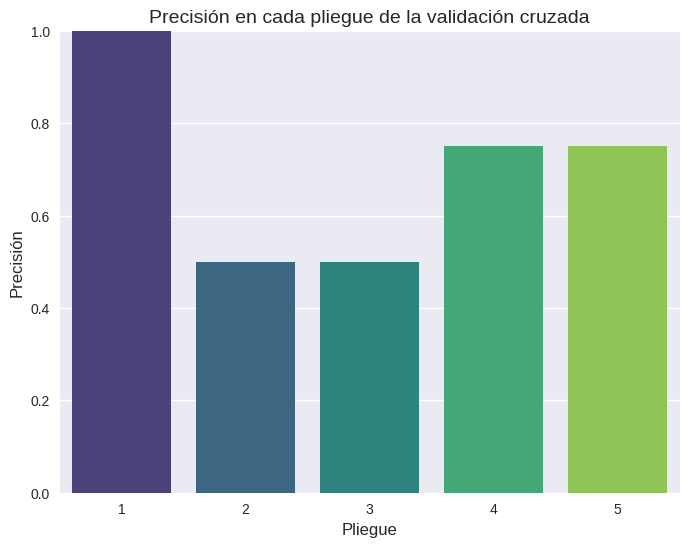

In [64]:
# La funcion cross_val_score de scikit-learn, por defecto, implementa la validacion cruzada K-Fold

# Validación cruzada con 5 pliegues
cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')

print("Precision media de la validacion cruzada:", cv_scores.mean())

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(1, len(cv_scores) + 1), y=cv_scores, palette="viridis")
plt.title("Precisión en cada pliegue de la validación cruzada", fontsize=14)
plt.xlabel("Pliegue", fontsize=12)
plt.ylabel("Precisión", fontsize=12)
plt.ylim(0, 1)
plt.show()